In [27]:
import neuronioE
import neuronioI
import numpy as np
import matplotlib.pyplot as plt

In [28]:
dt = 0.001
tmax = 200
N = round(tmax/dt)
gsin = 0.25
j_inj_e = 1.4
j_inj_i = 0

In [29]:
ve, he, ne, se = np.zeros(N), np.zeros(N), np.zeros(N), np.zeros(N)
vi, hi, ni, si = np.zeros(N), np.zeros(N), np.zeros(N), np.zeros(N)

ve[0], he[0], ne[0], se[0] = -65, neuronioE.x_inf('h',-65), neuronioE.x_inf('n',-65), 0
vi[0], hi[0], ni[0], si[0] = -65, neuronioI.x_inf('h',-65), neuronioI.x_inf('n',-65), 0
t = np.arange(0, tmax, dt)

In [30]:
for k in range(N-1):
    v,h,n,s = ve[k], he[k], ne[k], se[k]
    v1,h1,n1,s1 = vi[k], hi[k], ni[k], si[k]

    j = j_inj_e + gsin * s1 * (-v)
    ve[k+1] = ve[k] + dt * neuronioE.dvdt(v,h,n,j)
    he[k+1] = he[k] + dt * neuronioE.dhdt(v,h)
    ne[k+1] = ne[k] + dt * neuronioE.dndt(v,n)
    se[k+1] = se[k] + dt * neuronioE.dsdt(v,s)

    j1 = j_inj_i + gsin * s * (-v1)
    vi[k+1] = vi[k] + dt * neuronioI.dvdt(v1,h1,n1,j1)
    hi[k+1] = hi[k] + dt * neuronioI.dhdt(v1,h1)
    ni[k+1] = ni[k] + dt * neuronioI.dndt(v1,n1)
    si[k+1] = si[k] + dt * neuronioI.dsdt(v1,s1)

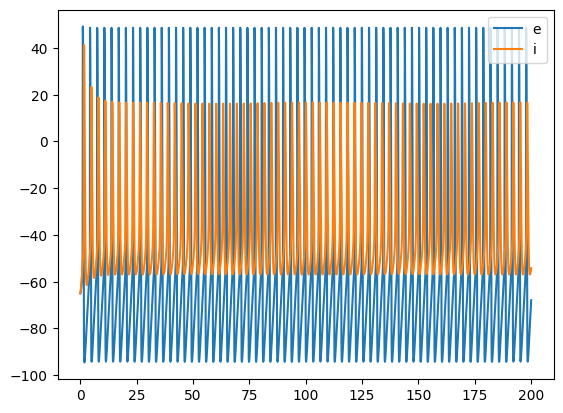

In [31]:
plt.plot(t, ve, label='e')
plt.plot(t, vi, label='i')
plt.legend()

plt.show()